In [3]:
# importing libarires
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import models, layers , optimizers

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df= pd.read_csv("/content/drive/MyDrive/compresive_strength_concrete.csv")

In [6]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [8]:
# check null values in dataframe
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [9]:
#statistical description of dataframe
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [10]:
# check all information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [11]:
# to gets columns name
df.keys()

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [12]:
# split dataframe into input and output
data=df.iloc[:,:8]
labels=df.iloc[:,-1]

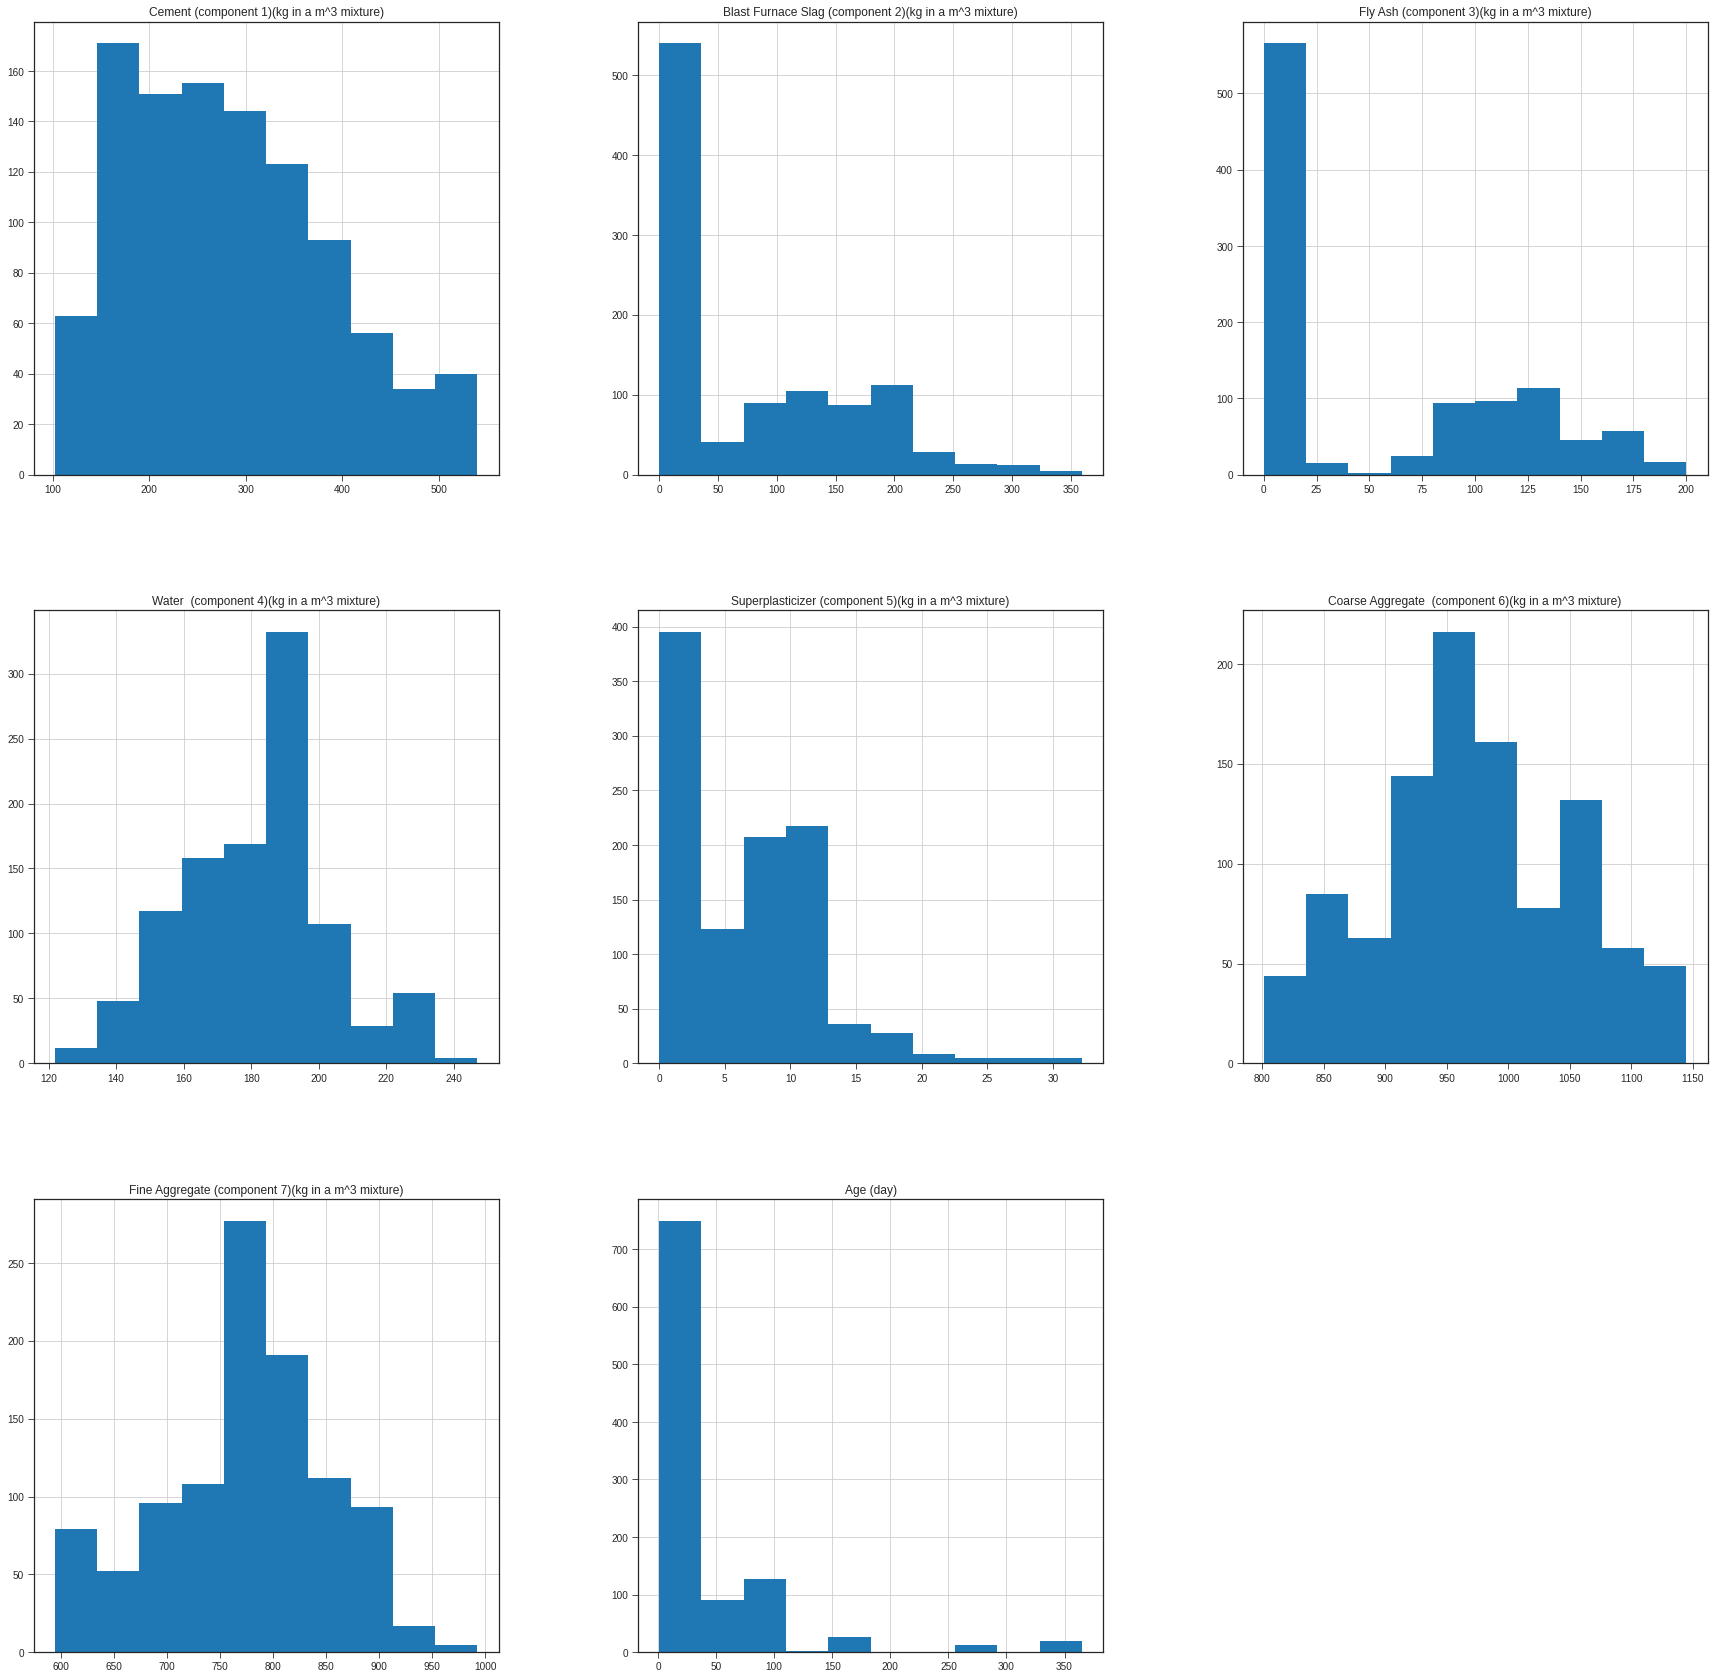

In [13]:
# show all input data in histogram
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
pd.DataFrame.hist(data,figsize = [30,30])
plt.show()

In [14]:
# standardized or normalized the data (input variables)
mean = data.mean(axis=0)
data-= mean
std = data.std(axis=0)
data/= std

In [15]:
# standardized or normalized the data (output variables)
labels_mean = labels.mean(axis=0)
labels-= labels_mean
labels_std = labels.std(axis=0)
labels/= labels_std

In [16]:
# data spliting into train & test
X_train=data.sample(frac=0.7,random_state=1)
X_test=data.sample(frac=0.3,random_state=1)
y_train=labels.sample(frac=0.7,random_state=1)
y_test=labels.sample(frac=0.3,random_state=1)

In [17]:
# check training data and training targets
print(f"Shape of training data :{X_train.shape},\nShape of training labels:{y_train.shape}")

Shape of training data :(721, 8),
Shape of training labels:(721,)


In [18]:
# check testing data and testing targets
print(f"Shape of testing data :{X_test.shape},\nShape of testing labels:{y_test.shape}")

Shape of testing data :(309, 8),
Shape of testing labels:(309,)


In [19]:
# convert dataframe into numpy array
X_train= np.asarray(X_train).astype('float32')
X_test= np.asarray(X_test).astype('float32')
#y_train= np.asarray(y_train).astype('float32')
#y_test= np.asarray(y_test).astype('float32')

In [20]:
# training data distrubted into validation data
val_X = X_train[:230]
partial_X_train=X_train[230:]
val_y=y_train[:230]
partial_y_train=y_train[230:]

In [21]:
# importing models libarires
from keras import models, layers , optimizers


In [22]:
# model building
network=models.Sequential()
network.add(tf.keras.layers.Dense(10,activation="relu",input_shape=(X_train.shape[1],)))
network.add(tf.keras.layers.Dropout(0.2))
network.add(tf.keras.layers.Dense(8,activation="relu"))
network.add(tf.keras.layers.Dropout(0.2))
network.add(tf.keras.layers.Dense(6,activation="relu"))
#network.add(tf.keras.layers.Dropout(0.5))
network.add(tf.keras.layers.Dense(1))

In [23]:
# model summary
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 239
Trainable params: 239
Non-trainable params: 0
__________________________________________________________

In [24]:
# model compiling
network.compile(optimizer=optimizers.RMSprop(lr=0.001), loss="mse",metrics=['mae'])

In [25]:
 #model training
history=network.fit(partial_X_train,partial_y_train,epochs=100,validation_data=(val_X,val_y),batch_size=1,verbose=1)

Epoch 1/100
491/491 [==============================] - 2s 2ms/step - loss: 1.1260 - mae: 0.8300 - val_loss: 0.7592 - val_mae: 0.6832
Epoch 2/100
491/491 [==============================] - 1s 1ms/step - loss: 0.8664 - mae: 0.7487 - val_loss: 0.6291 - val_mae: 0.6259
Epoch 3/100
491/491 [==============================] - 1s 1ms/step - loss: 0.8356 - mae: 0.7302 - val_loss: 0.5450 - val_mae: 0.5818
Epoch 4/100
491/491 [==============================] - 1s 1ms/step - loss: 0.7184 - mae: 0.6483 - val_loss: 0.4894 - val_mae: 0.5496
Epoch 5/100
491/491 [==============================] - 1s 1ms/step - loss: 0.6025 - mae: 0.6385 - val_loss: 0.4562 - val_mae: 0.5396
Epoch 6/100
491/491 [==============================] - 1s 1ms/step - loss: 0.6547 - mae: 0.6305 - val_loss: 0.4368 - val_mae: 0.5282
Epoch 7/100
491/491 [==============================] - 1s 1ms/step - loss: 0.5517 - mae: 0.6077 - val_loss: 0.4192 - val_mae: 0.5204
Epoch 8/100
491/491 [==============================] - 1s 1ms/step - 

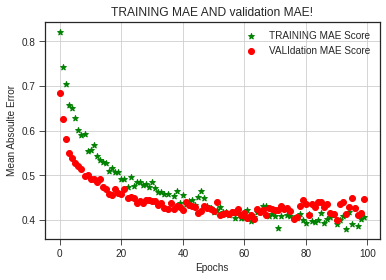

In [26]:
# show training and validation MAE
y1=history.history['mae']
x1=history.history['val_mae']
x=range(100)
plt.scatter(x,y1 , label= "TRAINING MAE Score", color= "green", marker= "*")
plt.scatter(x,x1, label= "VALIdation MAE Score", color= "r")
plt.xlabel('Epochs')
plt.ylabel('Mean Absoulte Error')
plt.title('TRAINING MAE AND validation MAE!')
plt.legend()
plt.grid()
plt.show()

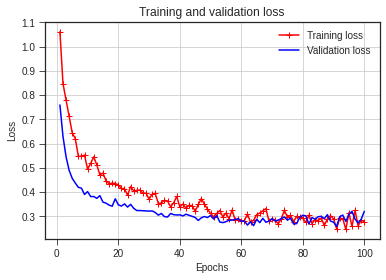

In [27]:
#show training and validation loss in graph
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r',marker="+", label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [28]:
# model evaluating on test data & label
test_mse_score, test_mae_score = network.evaluate(X_test, y_test)


10/10 [==============================] - 0s 2ms/step - loss: 0.3177 - mae: 0.4483


In [29]:
# check test mean squared error
test_mse_score

0.31769007444381714

In [30]:
# check test mean absoulte error
test_mae_score

0.4482676088809967

In [31]:
 #check presdictions on testing data
y_pred = network.predict(X_test)
y_pred=y_pred*labels_std+labels_mean

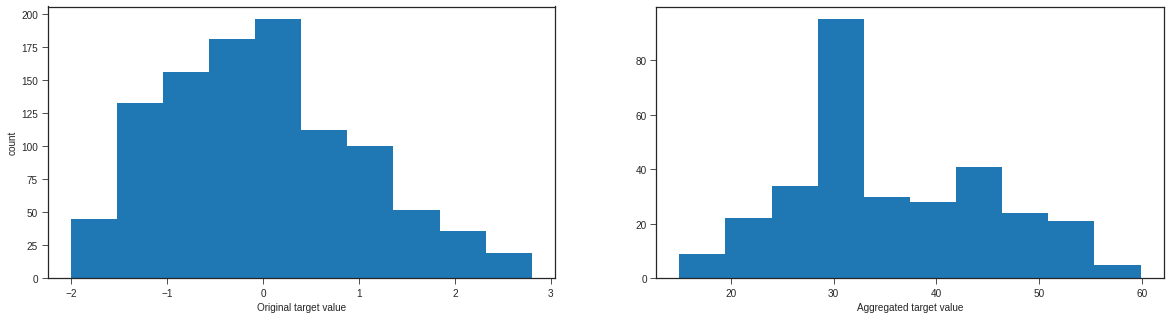

In [32]:
# check ploting of aggreted and actual values
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1 )
plt.hist(labels)
plt.xlabel('Original target value')
plt.ylabel('count')
plt.subplot(1, 2, 2)
plt.hist(y_pred)
plt.xlabel('Aggregated target value')
plt.show()